# The ROC curve and the AUC

Let's use the same three datasets we had earlier, and come up with our own code for constructing the ROC curve, i.e., calculate the confusion matrix for various thresholds.

While this is out of scope for now, note that I now use linear regression to obtain scores, rather than nominal outcomes you get from applying logistic regression. It is useful to do the latter as well, and save them for comparison's sake. The difference will become apparent as you progress through this course.

So, first, we have the data to obtain the actual outcomes and the predicted outcome:

## The data and models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc

from sklearn.linear_model import LinearRegression, LogisticRegression


dat1 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=8)
dat2 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=9)
dat3 = make_classification(n_samples=100, 
                    n_features=3, 
                    n_informative=3, 
                    n_redundant=0, 
                    n_repeated=0, 
                    n_classes=2, 
                    n_clusters_per_class=2, random_state=6)

# The continuous predictions from the linear regression
lin_regr = LinearRegression(normalize=True)
lin_regr.fit(dat1[0], dat1[1])
output1 = lin_regr.predict(dat1[0])
lin_regr.fit(dat2[0], dat2[1])
output2 = lin_regr.predict(dat2[0])
lin_regr.fit(dat2[0], dat2[1])
output3 = lin_regr.predict(dat3[0])

actuals = [dat1[1],dat2[1],dat3[1]]
predicted = [output1,output2,output3]

# The discrete predictions from the logistic regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(dat1[0],dat1[1])
outputD1 = log_reg.predict(dat1[0])
log_reg.fit(dat2[0],dat2[1])
outputD2 = log_reg.predict(dat2[0])
log_reg.fit(dat3[0],dat3[1])
outputD3 = log_reg.predict(dat3[0])
data = [outputD1,outputD2,outputD3]

## The metrics

We might find it interesting to use the methods from earlier as well:

In [2]:
def calculate_accuracy(TP,FP,FN,TN):
    return (TP+TN)/(TP+FP+FN+TN)
    
def calculate_recall(TP,FP,FN,TN):
    return (TP)/(TP+FN)    
    
def calculate_specificity(TP,FP,FN,TN):   
    return (TN)/(TN+FP)  

def calculate_precision(TP,FP,FN,TN):   
    return (TP)/(TP+FP)  

def calculate_fallout(TP,FP,FN,TN):   
    return (FP)/(FP+TN)  

def calculate_fscore(TP,FP,FN,TN):   
    return 2/((1/calculate_recall(TP,FP,FN,TN))+(1/calculate_precision(TP,FP,FN,TN))) 

def calculate_cm(predicted, actual):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(0,len(predicted)):
        if predicted[i] == 1:
            if predicted[i] == actual[i]:
                TP+=1
            else:
                FP+=1
        else:
            if predicted[i] == actual[i]:
                TN+=1
            else:
                FN+=1
    return TP,FP,FN,TN

## Creating the thresholds

We also need the thresholds for our curve. I will illustrate this quickly for dataset 1. Let's just use all values (scores) we observed in the dataset:

In [3]:
# The set operation makes sure every value is unique. For convenience, it is immediately converted into a list.
thresholds = set(predicted[0])
thresholds = list(thresholds)        

## Creating the ROC curve

Now let's write a function for calculating the confusion matrix at a certain threshold:

In [4]:
def calculate_at_threshold(threshold, actual, predicted):
    x_coord = 0
    y_coord = 0    

    # Keep track of the new prediction based on the given threshold in a new list
    new_pred = []
    for i in predicted:
        # If a prediction is above a certain threshold, store as positive prediction
        if i >= threshold:
            new_pred.append(1)
        else:
            new_pred.append(0)
    
    # Next, calculate the confusion matrix
    TP, FP, FN, TN = calculate_cm(new_pred, actual)
    
    # Use the confusion matrix to calculate the fallout (x-axis) and recall (y-axis)
    x_coord = calculate_fallout(TP,FP,FN,TN) 
    y_coord = calculate_recall(TP,FP,FN,TN)

    
    return x_coord, y_coord 

## Putting it all together

Now, let's bring it all together for the three datasets:

Dataset 0
	T	F
T	37	18
F	14	31
Accuracy 0.68
Recall 0.7254901960784313
Precision 0.6727272727272727
Specificity 0.6326530612244898
Fall-out 0.3673469387755102
F1-score 0.6981132075471698


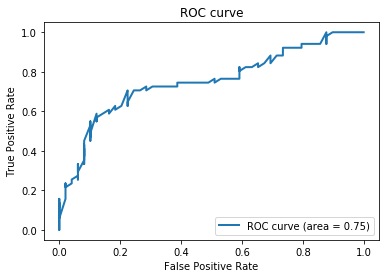

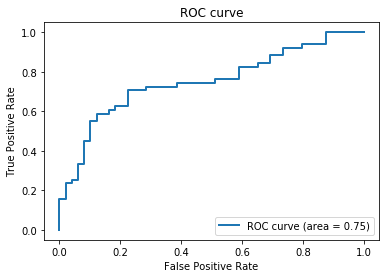

Dataset 1
	T	F
T	42	6
F	8	44
Accuracy 0.86
Recall 0.84
Precision 0.875
Specificity 0.88
Fall-out 0.12
F1-score 0.8571428571428572


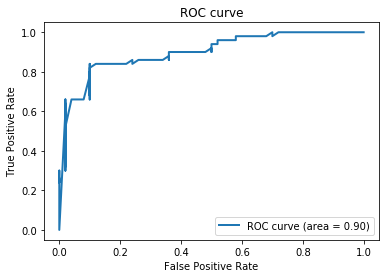

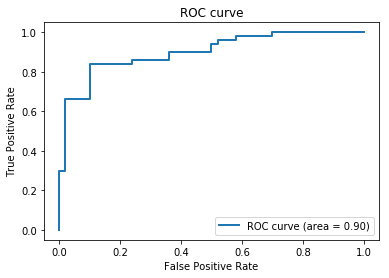

Dataset 2
	T	F
T	45	5
F	4	46
Accuracy 0.91
Recall 0.9183673469387755
Precision 0.9
Specificity 0.9019607843137255
Fall-out 0.09803921568627451
F1-score 0.9090909090909091


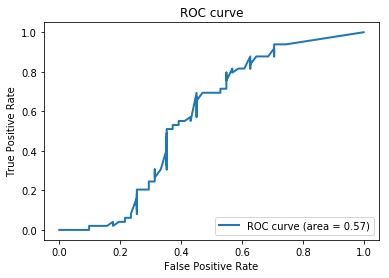

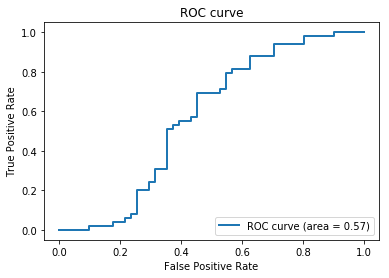

In [6]:
for i in range(0,3):
    
    # Let's calculate the standard metrics for the logistic regression output
    print('Dataset '+str(i))
    TP,FP,FN,TN = calculate_cm(data[i], actuals[i])
    print('\tT\tF')
    print('T\t'+str(TP)+'\t'+str(FP))
    print('F\t'+str(FN)+'\t'+str(TN))
        
    print('Accuracy '+str(calculate_accuracy(TP,FP,FN,TN)))
    print('Recall '+str(calculate_recall(TP,FP,FN,TN)))
    print('Precision '+str(calculate_precision(TP,FP,FN,TN)))
    print('Specificity '+str(calculate_specificity(TP,FP,FN,TN)))
    print('Fall-out '+str(calculate_fallout(TP,FP,FN,TN)))
    print('F1-score '+str(calculate_fscore(TP,FP,FN,TN)))
        
    # Same as before
    thresholds = set(predicted[i])
    thresholds = list(thresholds)
        
    # Find all the coordinates (false and true positive rate on the x and y axis respectively) and save them in fpr and tpr
    # For all thresholds
    fpr = []
    tpr = []
    for threshold in thresholds:   
        if threshold >= 0 and threshold<=1:
            fpr_t, tpr_t = calculate_at_threshold(threshold,actuals[i],predicted[i])
            fpr.append(fpr_t)
            tpr.append(tpr_t)
    fpr = np.asarray(fpr)
    tpr = np.asarray(tpr)
    
    # Make sure (0,0) and (1,1) are included
    fpr = np.append(fpr,0)
    tpr = np.append(tpr,0)
    fpr = np.append(fpr,1)
    tpr = np.append(tpr,1)
    
    # This function sorts all points in the false positive rate dimension
    desc_score_indices = np.argsort(fpr)[::-1]
    fpr = fpr[desc_score_indices]
    tpr = tpr[desc_score_indices]

    
    # This function calculates the area under curve
    roc_auc = auc(fpr,tpr)
    
    # Create the graph 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.plot(fpr, tpr,
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()    
        
    # Or do it the easy way and calculate it with the roc() function
    fpr, tpr, thresholds = roc(actuals[i],predicted[i])
    roc_auc = auc(fpr,tpr)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fpr, tpr,
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

Notice how our ROC curve is not as squared as the one we obtain by using the roc() function. This is due to the fact that we don't connect the data points we generate at the different thresholds horizontally, but just draw a line between them. Hence the somewhat bizarre looking outcome. Also, the ordering along the y-axis should have been taken into account for the horizontal connection. Nevertheless, the AUC is still the same, so that's good news. In any case, you have programmed your own ROC curve. Well done!